In [1]:
%autoreload

from ase.io import read
from phonopy import load

from vibes.harmonic_analysis.dynamical_matrix import get_frequencies
from vibes.helpers.brillouinzone import get_bands_and_labels

In [2]:
primitive = read("geometry.in.primitive", format="aims")
supercell = read("geometry.in.supercell", format="aims")

In [3]:
phonon = load("phonopy.yaml")
d = phonon.dynamical_matrix

In [4]:
bands, labels = get_bands_and_labels(primitive, npoints=50)
path = bands[0]
labels

['G', 'X', 'U|K', 'G', 'L']

In [5]:
x = []
band = np.zeros((len(path), len(primitive) ** 2))

for ii, q in enumerate(zip(path)):
    x.append(np.linalg.norm(q) / np.pi)

    d.set_dynamical_matrix(q)
    D = d.get_dynamical_matrix()
    freqs = get_frequencies(D)
    band[ii] = freqs

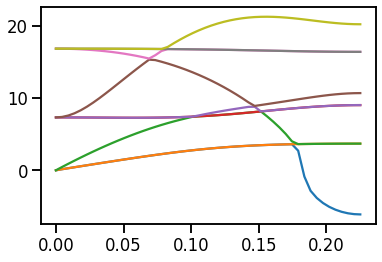

In [6]:
for ii in range(band.shape[1]):
    plt.plot(x, band[:, ii])